In [1]:
import arviz as az
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

# Commented out IPython magic to ensure Python compatibility.

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
# %config InlineBackend.figure_format = 'retina'


In [2]:
# get data
df = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")

  #df.plot.scatter(x="ds", y="y", color="k")

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
len(df)

90189

In [ ]:
np.mean(df['retention_7'])

0.1860648194347426

In [4]:
observations_A = df[df['version'] == 'gate_30']['retention_1']
observations_B = df[df['version'] == 'gate_40']['retention_1']
#print("Obs from Site A: ", observations_A[:30], "...")
#print("Obs from Site B: ", observations_B[:30], "...")

In [5]:
#Prior Belief Definition
with pm.Model() as model:
    p_30 = pm.Uniform('p_30')#, lower=0, upper=1)
    p_40 = pm.Uniform('p_40')#, lower=0, upper=1)

    #lambda_ = pm.math.switch(df['version']=='gate_30', p_30, p_40)

    #observed = pm.Bernoulli("obs", lambda_, observed=df['retention_1'])
    obs_30 = pm.Bernoulli("obs_30", p_30, observed=observations_A)
    obs_40 = pm.Bernoulli("obs_40", p_40, observed=observations_B)


In [6]:
with model:
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(20000,step=step,chains=2)

Output()

Output()

In [7]:
p_A_samples =  np.concatenate(trace.posterior.p_30.data[:,1000:])
p_B_samples =  np.concatenate(trace.posterior.p_40.data[:,1000:])

In [ ]:
p_A_samples

array([0.19128713, 0.19128713, 0.19080723, ..., 0.19287115, 0.19287115,
       0.19287115])

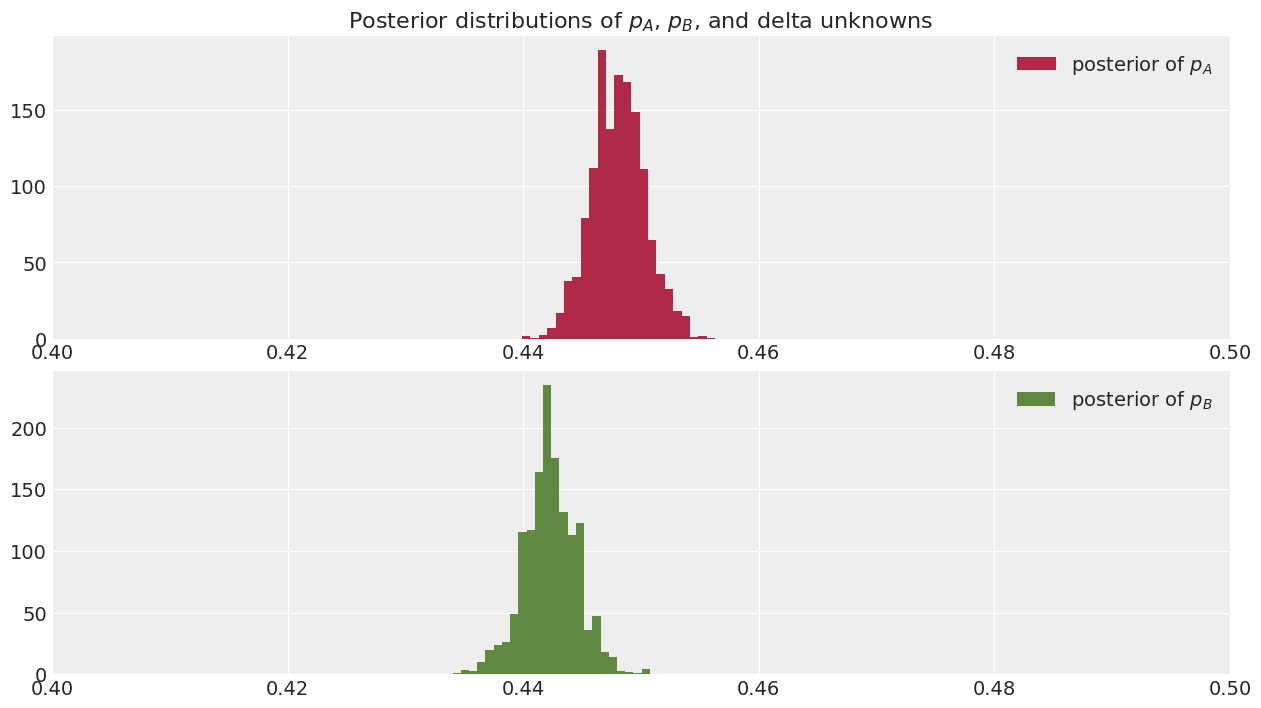

In [8]:
plt.figure(figsize = (12.5,10))

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0.4, 0.5)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", density=True)
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0.4, 0.5)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", density=True)
plt.legend(loc="upper right")

In [9]:
observations_A = df[df['version'] == 'gate_30']['retention_7']
observations_B = df[df['version'] == 'gate_40']['retention_7']

#Prior Belief Definition
with pm.Model() as model:
    p_30 = pm.Uniform('p_30')#, lower=0, upper=1)
    p_40 = pm.Uniform('p_40')#, lower=0, upper=1)

    #lambda_ = pm.math.switch(df['version']=='gate_30', p_30, p_40)

    #observed = pm.Bernoulli("obs", lambda_, observed=df['retention_1'])
    obs_30 = pm.Bernoulli("obs_30", p_30, observed=observations_A)
    obs_40 = pm.Bernoulli("obs_40", p_40, observed=observations_B)

In [10]:
with model:
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(20000,step=step,chains=2)

Output()

/usr/local/lib/python3.10/dist-packages/pymc/step_methods/metropolis.py:313: RuntimeWarning: overflow encountered 
in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),

Output()

In [11]:
p_A_samples =  np.concatenate(trace.posterior.p_30.data[:,1000:])
p_B_samples =  np.concatenate(trace.posterior.p_40.data[:,1000:])

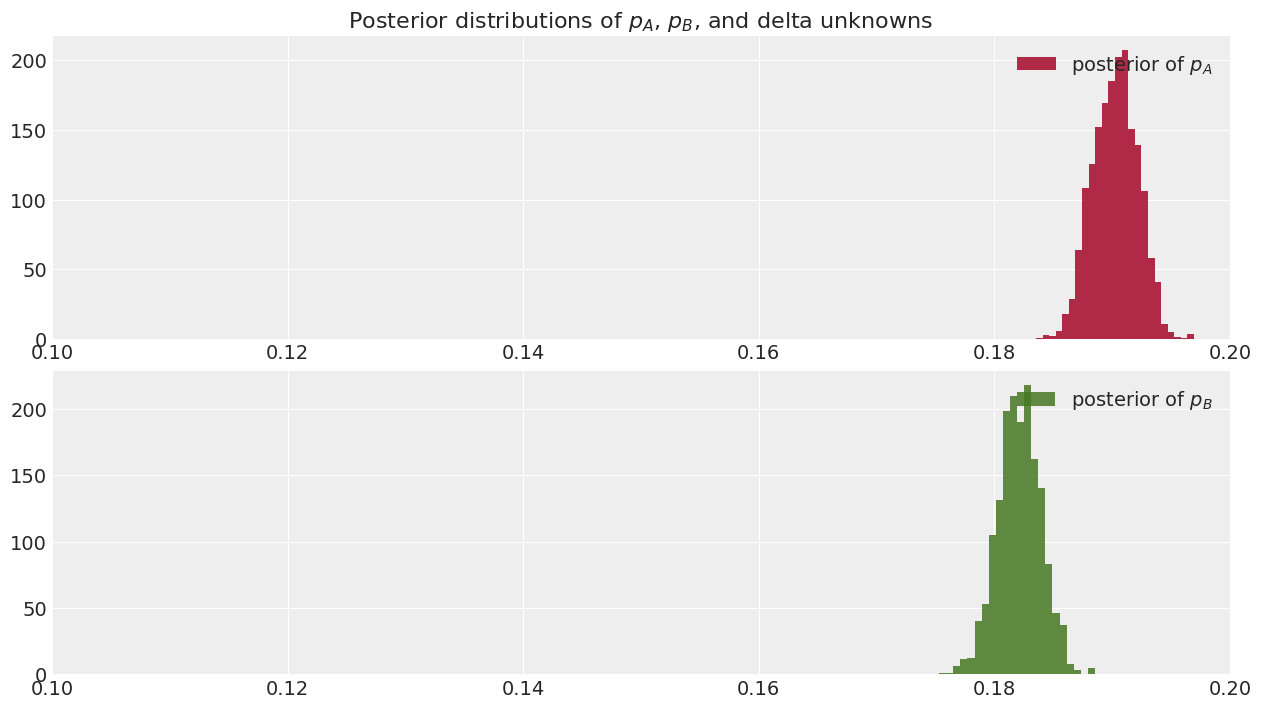

In [12]:
plt.figure(figsize = (12.5,10))

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0.1, 0.2)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", density=True)
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0.1, 0.2)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", density=True)
plt.legend(loc="upper right")